In [1]:
!git clone https://github.com/yashilvora19/accident_severity_prediction

Cloning into 'accident_severity_prediction'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 177 (delta 31), reused 4 (delta 4), pack-reused 109
Receiving objects: 100% (177/177), 32.69 MiB | 19.13 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Filtering content: 100% (2/2), 204.46 MiB | 5.56 MiB/s, done.


In [112]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('data-cleaned.csv')

In [113]:
df

,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Day,Month,Year,...,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under,Fine,Fog or mist,High winds,Other,Raining,Snowing
0,1,0.146799,2,Kensington and Chelsea,0.787557,1,2,5,6,2019,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,1,0.145770,3,Kensington and Chelsea,0.791377,1,2,2,7,2019,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
2,1,0.145811,3,Kensington and Chelsea,0.788242,1,4,16,8,2019,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
3,1,0.146021,3,Kensington and Chelsea,0.789339,2,3,18,9,2019,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4,1,0.146358,3,Kensington and Chelsea,0.792677,1,2,5,9,2019,...,0.0,0.0,0.0,1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638020,0,0.687955,3,Highland,0.436333,2,1,18,2,2022,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
638021,0,0.674884,0,Highland,0.399531,1,1,21,2,2022,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
638022,0,0.707418,3,Highland,0.393771,1,3,23,2,2022,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
638023,1,0.673281,0,Highland,0.397945,1,2,23,2,2022,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0


In [114]:
# Additional preprocessing- 'District_Area' doesnt add value to our data since we have latitude and longitude

df = df.drop('District_Area', axis=1)
X = df.drop('Accident_Severity', axis=1)
y=df['Accident_Severity']

# Final preprocessing steps- standardizing the data to account for outliers

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

In [118]:
model1 = Sequential()

model1.add(Dense(units = 64, activation = 'sigmoid', input_dim = X_train.shape[1]))
model1.add(Dense(units = 32, activation = 'sigmoid'))
model1.add(Dense(units = 16, activation = 'sigmoid'))
model1.add(Dense(units = 3, activation = 'softmax'))


model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train.astype('float'), y_train, batch_size = 200, epochs = 100, validation_split=0.2, verbose = 1)

Epoch 1/100
2042/2042 [==============================] - 9s 4ms/step - loss: 0.4626 - accuracy: 0.8500 - val_loss: 0.4475 - val_accuracy: 0.8515
Epoch 2/100
2042/2042 [==============================] - 9s 4ms/step - loss: 0.4456 - accuracy: 0.8524 - val_loss: 0.4458 - val_accuracy: 0.8515
Epoch 3/100
2042/2042 [==============================] - 7s 3ms/step - loss: 0.4436 - accuracy: 0.8524 - val_loss: 0.4443 - val_accuracy: 0.8515
Epoch 4/100
2042/2042 [==============================] - 8s 4ms/step - loss: 0.4422 - accuracy: 0.8524 - val_loss: 0.4433 - val_accuracy: 0.8515
Epoch 5/100
2042/2042 [==============================] - 8s 4ms/step - loss: 0.4416 - accuracy: 0.8524 - val_loss: 0.4433 - val_accuracy: 0.8515
Epoch 6/100
2042/2042 [==============================] - 8s 4ms/step - loss: 0.4413 - accuracy: 0.8524 - val_loss: 0.4450 - val_accuracy: 0.8515
Epoch 7/100
2042/2042 [==============================] - 6s 3ms/step - loss: 0.4412 - accuracy: 0.8524 - val_loss: 0.4433 - val_ac

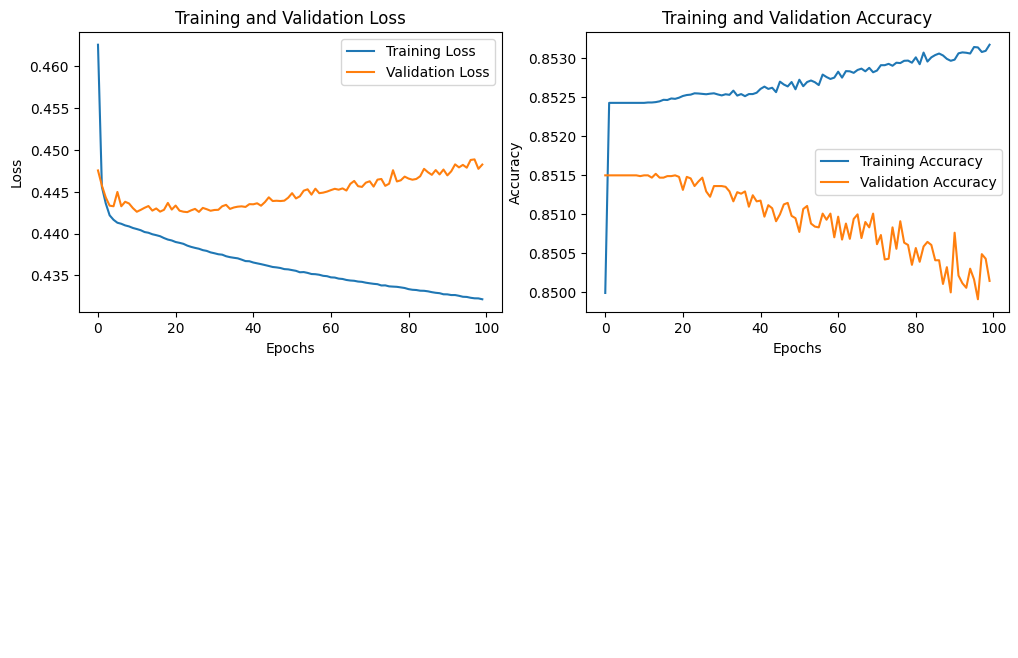

In [119]:
# Let's plot the loss for this model- lets also make a function that can be used everywhere

import matplotlib.pyplot as plt

def plot_model_metrics(history):
  # subplots
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))

  # Plot training and validation loss
  axs[0, 0].plot(history.history['loss'], label='Training Loss')
  axs[0, 0].plot(history.history['val_loss'], label='Validation Loss')
  axs[0, 0].set_title('Training and Validation Loss')
  axs[0, 0].set_xlabel('Epochs')
  axs[0, 0].set_ylabel('Loss')
  axs[0, 0].legend()

  # Plot training and validation accuracy
  axs[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
  axs[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
  axs[0, 1].set_title('Training and Validation Accuracy')
  axs[0, 1].set_xlabel('Epochs')
  axs[0, 1].set_ylabel('Accuracy')
  axs[0, 1].legend()
  axs[1, 0].axis('off')
  axs[1, 1].axis('off')
  plt.show()

plot_model_metrics(history)

In [120]:
model1.save("my_model.keras")

In [121]:
# from tensorflow.keras.models import load_model
# classifier = load_model("my_model.keras")

In [122]:
yhat_test = model1.predict(X_test.astype(float))
yhat_train = model1.predict(X_train.astype(float))

15951/15951 [==============================] - 28s 2ms/step


In [123]:
import numpy as np

for row in yhat_test:
  index = np.argmax(row)
  for i in range(len(row)):
    if i == index:
      row[i]=1
    else:
      row[i]=0

for row in yhat_train:
  index = np.argmax(row)
  for i in range(len(row)):
    if i == index:
      row[i]=1
    else:
      row[i]=0

In [124]:
mse = model1.evaluate(X_test.astype(float), y_test)
print("Testing Mean Squared Error:", str(mse[0]))
print("Testing Accuracy:", str(mse[1]))

3988/3988 [==============================] - 7s 2ms/step - loss: 0.4496 - accuracy: 0.8501
Testing Mean Squared Error: 0.4496142864227295
Testing Accuracy: 0.8501390814781189


In [125]:
mse = model1.evaluate(X_train.astype(float), y_train)
print("Training Mean Squared Error:", str(mse[0]))
print("Training Accuracy:", str(mse[1]))

15951/15951 [==============================] - 30s 2ms/step - loss: 0.4346 - accuracy: 0.8527
Training Mean Squared Error: 0.4345817267894745
Training Accuracy: 0.8526958227157593


In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [127]:
# yhat_test
count1_test=count2_test=count3_test=0

for i in yhat_test:
  if i[0] == 1:
    count1_test += 1
  elif i[1] == 1:
    count2_test += 1
  elif i[2] == 1:
    count3_test += 1


count1_train=count2_train=count3_train=0

for i in yhat_train:
  if i[0] == 1:
    count1_train += 1
  elif i[1] == 1:
    count2_train += 1
  elif i[2] == 1:
    count3_train += 1

testing_frequencies = [count1_test, count2_test, count3_test]
training_frequencies = [count1_train, count2_train, count3_train]

print(testing_frequencies)
print(training_frequencies)

[127144, 414, 47]
[508740, 1539, 141]


In [134]:
actual_test_freq =  y_test.value_counts()
actual_train_freq = y_train.value_counts()

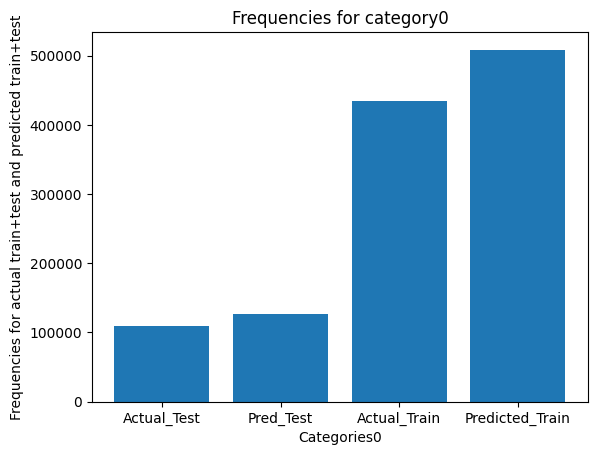

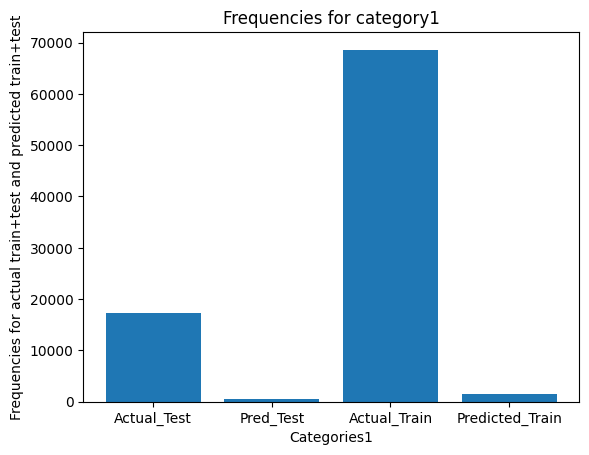

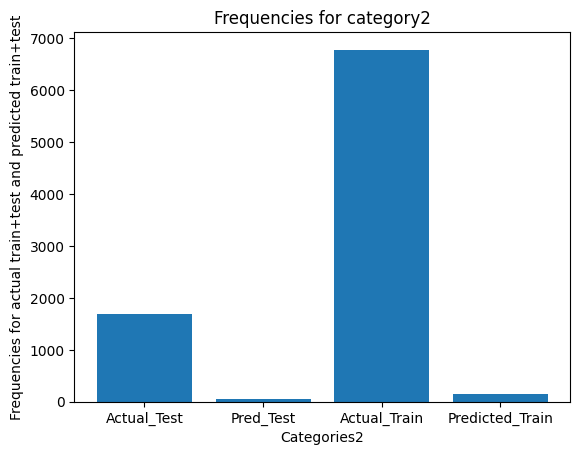

In [136]:

for i in range(0,3):
  freqs = [actual_test_freq[i], testing_frequencies[i], actual_train_freq[i], training_frequencies[i]]
  plt.bar(['Actual_Test', 'Pred_Test', 'Actual_Train', 'Predicted_Train'], freqs)
  plt.xlabel('Categories' + str(i))
  plt.ylabel('Frequencies for actual train+test and predicted train+test')
  plt.title('Frequencies for category' + str(i))
  plt.show()

As we can see, this model has performed better than the logistic regression model since we are getting predictions for the other classes. Lets print out our classification reports now.

In [143]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_test_encoded = ohe.fit_transform(y_test.values.reshape(-1,1)).toarray()
y_train_encoded = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

Analysis for severity 1
              precision    recall  f1-score   support

         0.0       0.37      0.01      0.02     18967
         1.0       0.85      1.00      0.92    108638

    accuracy                           0.85    127605
   macro avg       0.61      0.50      0.47    127605
weighted avg       0.78      0.85      0.79    127605



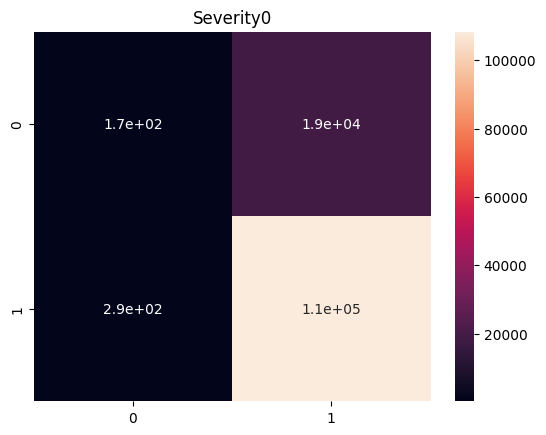

Analysis for severity 2
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    110327
         1.0       0.31      0.01      0.01     17278

    accuracy                           0.86    127605
   macro avg       0.59      0.50      0.47    127605
weighted avg       0.79      0.86      0.80    127605



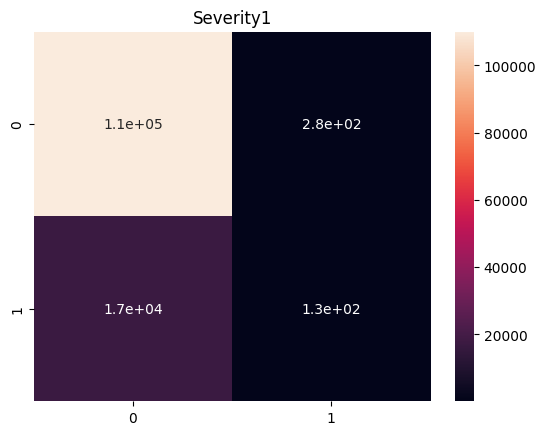

Analysis for severity 3
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    125916
         1.0       0.13      0.00      0.01      1689

    accuracy                           0.99    127605
   macro avg       0.56      0.50      0.50    127605
weighted avg       0.98      0.99      0.98    127605



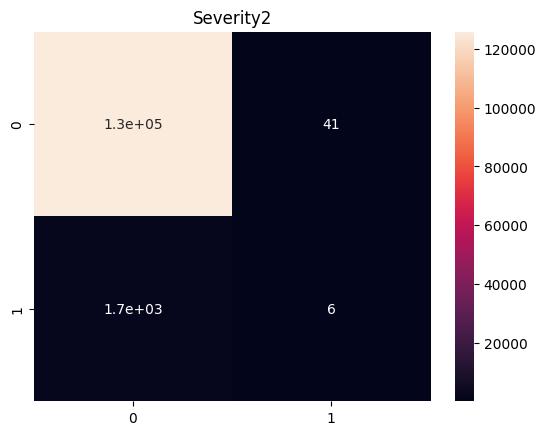

In [146]:
for i in range(0,3):
  print("Analysis for severity " + str(i+1))
  print(classification_report(y_test_encoded[:,i], yhat_test[:,i]))
  cm = confusion_matrix(y_test_encoded[:,i], yhat_test[:,i])
  sns.heatmap(cm, annot=True)
  plt.title('Severity' + str(i))
  plt.show()